# Sheet 10: Solution

In [11]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=6,repr.plot.height=5) # this is just to render graphics as png and not as svg, and to adjust the default size

In [16]:
require(rpart) ## For trees
require(ggplot2)
library(reshape2)

Loading required package: rpart
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



## Exercise 1


Classification tree:
rpart(formula = Species ~ ., data = iris)

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 100/150 = 0.66667

n= 150 

    CP nsplit rel error xerror     xstd
1 0.50      0      1.00   1.18 0.050173
2 0.44      1      0.50   0.64 0.060575
3 0.01      2      0.06   0.08 0.027520


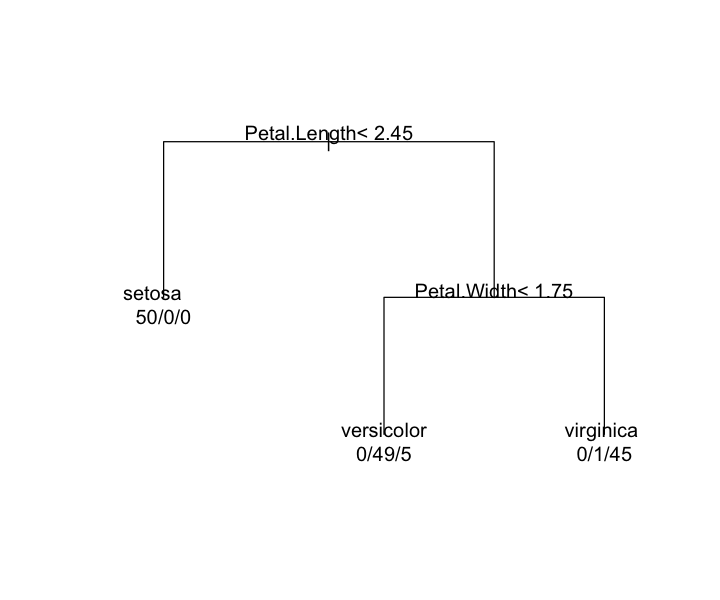

In [15]:
data(iris)

irisTree <- rpart(Species ~ ., data = iris)
plot(irisTree, margin = 0.1)
text(irisTree, use.n = TRUE)

printcp(irisTree)

The result is a very short tree: If Petal.length is smaller than 2.45 we label the flower with setosa. Else we look at the covariable Petal.Width. Is Petal.Width smaller than 1.75? If so, we label the flower versicolor, else virginica.

In [16]:
irisTree

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

The results from the tree show, that all of the Iris flowers which are in the left node are correctly labeled setosa, no other flower is in this terminal node of the tree. The other terminal nodes are also very pure, the versicolor labeled node contains 54 correctly assigned flowers and 5 wrongly assigned. The virginic node has about the same purity (46 correctly, 1 incorrectly assigned).

The method-argument can be switched according to the type of the response variable. It is “class”“ for categorial, "anova”“ for numerical, "poisson”“ for count data and "exp”“ for survival data. 

## Exercise 2

1. Illustration of the relation to naive Bayes on the genetic fingerprint data. For comparison reasons we reorder the columns.

In [6]:
load("prac7.RData")
write.csv(prac7Train,'prac7Train.csv')
write.csv(prac7Test,'prac7Test.csv')

prac7Train <- prac7Train[, c(sort(names(prac7Train)[-16]), "population")]
head(prac7Train)
head(prac7Test)
table(prac7Train$population) 

,CSF1PO,D13S317,D16S539,D18S51,D19S433,D21S11,D2S1338,D3S1358,D5S818,D7S820,D8S1179,FGA,TH01,TPOX,vWA,population
OT07760,21,22,23,35,30.2,59.0,41,34,24,17,21,47,13.0,19,33,Caucasian
PT84187,18,23,26,35,27.0,55.0,38,33,26,20,29,47,15.3,21,36,African American
UA16921,21,22,22,25,25.0,60.0,46,32,22,19,22,40,16.0,21,33,Caucasian
PT83880,20,21,22,28,27.0,61.2,44,31,22,17,26,47,16.0,19,35,African American
Y6,24,26,24,28,28.0,63.2,43,33,25,20,29,43,15.3,16,34,Caucasian
Y5,23,24,24,27,28.0,58.0,42,32,21,21,31,45,15.3,18,36,Caucasian


,D8S1179,D21S11,D7S820,CSF1PO,D3S1358,TH01,D13S317,D16S539,D2S1338,D19S433,vWA,TPOX,D18S51,D5S818,FGA,population
UT57281,25,61.2,21,24,31,16.0,21,22,41,29.0,34,19,35,23,45,Caucasian
PT84212,25,62.2,17,22,32,18.3,23,21,36,25.2,30,16,33,24,51,African American
GT38086,25,60.0,24,22,33,13.0,24,20,44,27.0,29,18,26,21,39,Caucasian
ZT79338,29,63.0,21,24,32,15.0,25,17,33,28.2,38,17,29,22,50,African American
ZT81387,28,60.2,21,22,36,14.0,22,25,43,27.0,35,15,34,22,43,Caucasian
UT58317,24,60.0,19,21,32,15.0,21,21,43,29.0,34,16,25,25,47,Caucasian



African American        Caucasian 
             173              176 

3. Constructing the classification tree on the genetic fingerprint data 

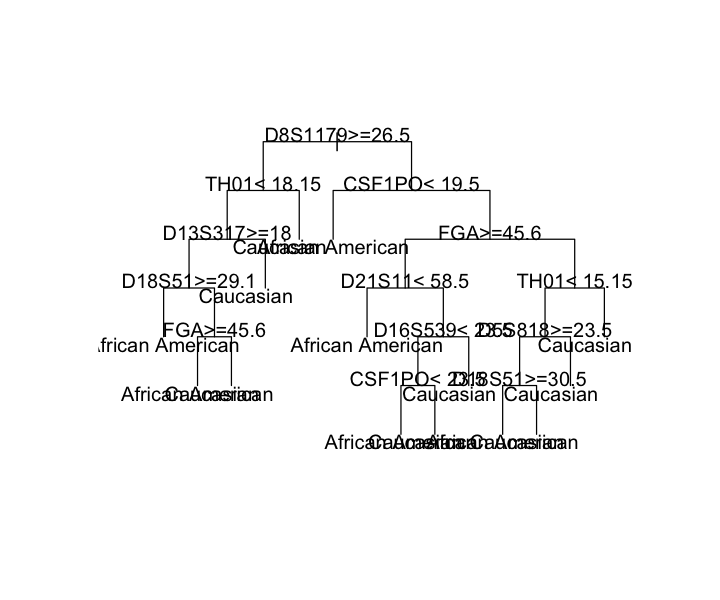

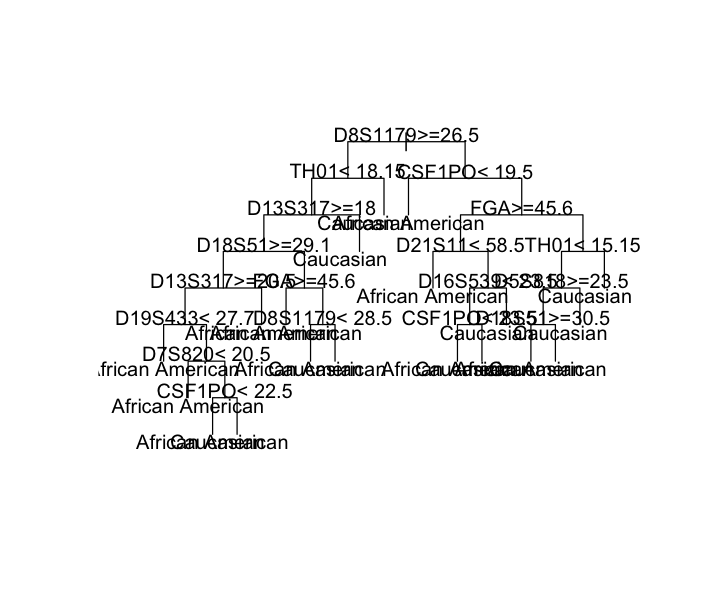

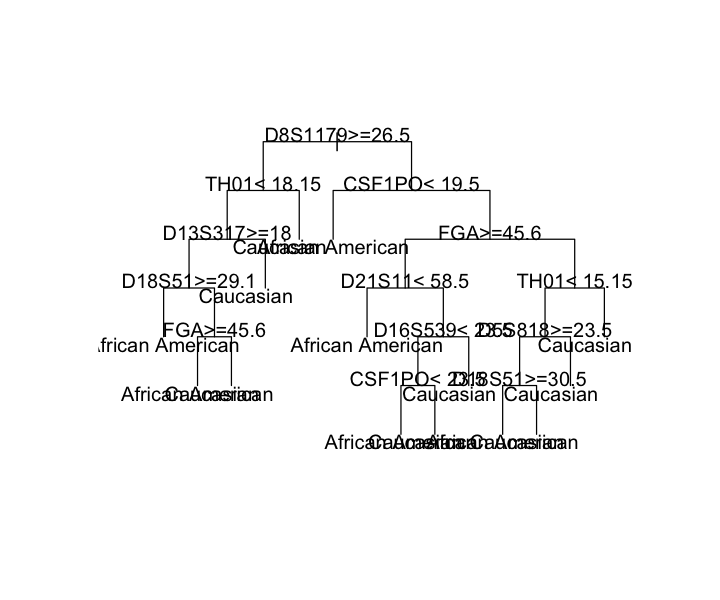

In [21]:
prac7Tree <- rpart(population ~ ., data = prac7Train)
plot(prac7Tree, uniform = TRUE, margin = 0.1)
text(prac7Tree)

### Different choice of complexity parameter
prac7Tree <- rpart(population ~ ., data = prac7Train,
                   control = list(cp = 0.0001))
plot(prac7Tree, uniform = TRUE, margin = 0.1)
text(prac7Tree)
prac7Tree <- prune(prac7Tree, 0.01)
plot(prac7Tree, uniform = TRUE, margin = 0.1)
text(prac7Tree)


In [34]:
### Computing the training error
yHat <- predict(prac7Tree, type = "class")
# print(yHat)
y <- prac7Train$population
pred <- table(yHat, y)
print(pred)
print(pred/sum(pred), digits=3)

# ### Computing the test error

yHat <- predict(prac7Tree, prac7Test, type = "class")
yTest <- prac7Test$population
pred <- table(yHat, yTest)
print(pred)
print(pred/sum(pred), digits=3)



                  y
yHat               African American Caucasian
  African American              155        32
  Caucasian                      18       144
                  y
yHat               African American Caucasian
  African American           0.4441    0.0917
  Caucasian                  0.0516    0.4126
                  yTest
yHat               African American Caucasian
  African American               63        31
  Caucasian                      19        56
                  yTest
yHat               African American Caucasian
  African American            0.373     0.183
  Caucasian                   0.112     0.331


## Exercise 3

In [17]:
require(randomForest)
## Classification:
##data(iris)
set.seed(71)
prac7.rf <- randomForest(population ~ ., data = prac7Train, importance=TRUE,
                        proximity=TRUE)
print(prac7.rf)

yHat <- predict(prac7.rf, prac7Test, type = "class")
yTest <- prac7Test$population
pred <- table(yHat, yTest)
print(pred)
print(pred/sum(pred), digits=3)



Call:
 randomForest(formula = population ~ ., data = prac7Train, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.33%
Confusion matrix:
                 African American Caucasian class.error
African American              145        28   0.1618497
Caucasian                      22       154   0.1250000
                  yTest
yHat               African American Caucasian
  African American               62        15
  Caucasian                      20        72
                  yTest
yHat               African American Caucasian
  African American           0.3669    0.0888
  Caucasian                  0.1183    0.4260


Some of the more important differences between randomForest and rpart functions are:
1. randomForest does not give a unique tree.
2. Use of randomForest is largely automatic, with limited need or opportunity for
tuning.However, calculations that use randomForest may take a long time when there are extensive
data.
3. For randomForest, there is no direct equivalent of rpart’s cp parameter, and
no possibility or necessity to prune trees.
4. rpart requires a model formula, whereas randomForest allows, alternatively,
specification of a matrix whose columns are used as predictors.
5. randomForest does not have a direct equivalent of rpart’s method argument,
that can be used to distinguish between regression, classification, and other models.
Instead, randomForest assumes a classification model if the response is a factor, and
otherwise assumes a regression model.
6. Accuracy is, for some data sets, markedly better for randomForest than for
rpart. One can use function compareTreecalcs to compare the trees and classification rates.
7. The most important difference is: single decision tree turns to overfit but a randomForest does not (e.g. the testing error of randomForest is smaller than that of decision tree although their both have comparable training errors)


Call:
roc.default(response = yTest, predictor = yProb[, 2], auc = "True")

Data: yProb[, 2] in 82 controls (yTest African American) < 87 cases (yTest Caucasian).
Area under the curve: 0.8752


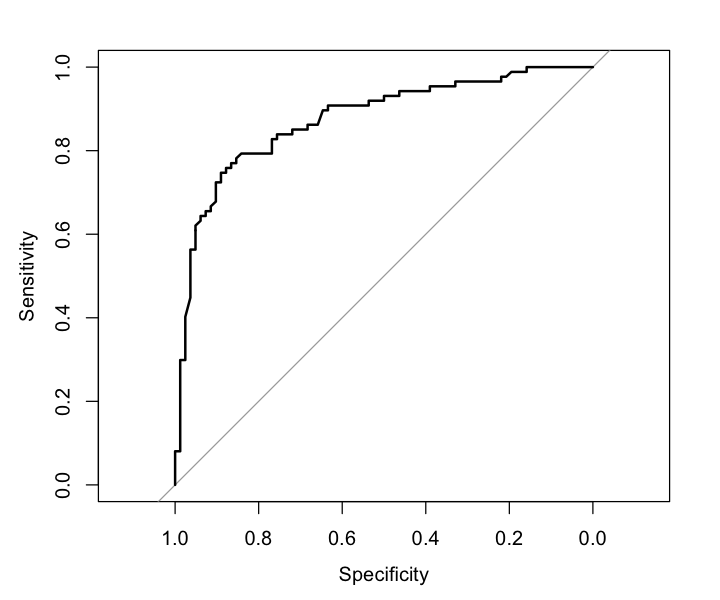

In [14]:
library(pROC)
yProb <- predict(prac7.rf, prac7Test, type = "prob")
roc.rf <- roc(yTest,yProb[,2],plot="True")
auc.rf <- roc(yTest,yProb[,2],auc="True")
print(auc.rf)